In [ ]:
# 数据可视化项目展示

# 案例一：折线图、直方图、横竖向条形图、饼图

# 利用matplotlib 分析链家租房数据并制作可视化图表
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.font_manager import fontManager as fm
import matplotlib
# 显示中文字体为内置的字体文件，并全局设置为导入的字体；
fm.addfont('/kaggle/input/ygbuding/DroidSansFallback.ttf')
matplotlib.rc('font',family = 'Droid Sans Fallback',size=10)
plt.rcParams['axes.unicode_minus'] = False # 设置负号，以ASCII 字符'-'来显示，避免出现方块；

In [ ]:
# task1--读取 CSV 格式文件“task_2_lianjia_data.csv”;
# 将数据命名为 lianjia_data;
# 并选取前部数据查看;
lianjia_data = pd.read_csv('/kaggle/input/lianjia-data/task_2_lianjia_data.csv')
print(lianjia_data)

In [ ]:
print(lianjia_data.info())

In [ ]:
print(lianjia_data.describe())

In [ ]:
print(lianjia_data.head())

In [ ]:
# task2--利用 groupby 函数，以【面积大小（㎡）】字段进行 groupby;
# 统计各个面积下的【房源数量】情况;
a = lianjia_data.groupby('面积大小（㎡）')['区'].agg([('房源数量','count')])
print(a)
print('-'*30)
print(type(a))

In [ ]:
# task3--将第2问所统计数据，作折线图和条形图;
# 并得出相关结论，
# 提示:先提取第2问 所得数据表的 index 索引，并转化成 list;
# 再提取【房源数量】的值转成 list;
# 提取lianjia_squre的索引，即不同的面积大小，并转换成list，用作横坐标值
a_x = list(a.index)
print(a_x)

In [ ]:
# 提取lianjia_squre【房源数量】的数据值，用作纵坐标值
a_y = list(a['房源数量'].values)
print(a_y)

In [ ]:
# 调用plt，作趋势图（即折线图）
# plt.plot（横坐标数值，纵坐标数值，线的类型，颜色，线宽，标记点类型，标记大小,与下方一一对应
plt.plot(a_x,a_y,'-.',color = 'sandybrown',linewidth = 2)
# 设置图片标题
plt.title('各类房源面积对应房源数')
# 设置图片横轴标签
plt.xlabel('房源面积')
# 设置图片纵轴标签
plt.ylabel('房源数量')
# 设置图片大小
plt.rcParams['figure.figsize'] = (25,15)
# 保存图片为
plt.savefig('house_area_plot.jpeg')
# 展示图片
plt.show()

In [ ]:
# 调用plt，作条形图--直方图形式
# plt.bar（横坐标数值，纵坐标数值，条形分布类型，颜色，条形透明度）
# plt.bar(lianjia_squre_index,lianjia_count,align="center",color="r",alpha=0.7)
plt.bar(a_x,a_y,align='center',color = 'saddlebrown',alpha = 0.7)
# 设置图片标题
plt.title('各类房源面积对应房源数')
# 设置图片横轴标签
plt.xlabel('房源面积')
# 设置图片纵轴标签
plt.ylabel('房源数量')
# 设置图片大小
plt.rcParams['figure.figsize'] = (25,15)
# 保存图片为
plt.savefig('house_area_bar.jpeg')
# 展示图片
plt.show()

In [ ]:
# 横向条形图
plt.barh(a_x,a_y,align="center",color='saddlebrown',alpha=0.5)
# 保存图片
plt.savefig('house_area_barh.jpeg')
# 展示图片
plt.show()

In [ ]:
# task4--利用 groupby 函数，
# 以【区】字段进行 groupby，
# 统计各个上海各个“区”所属的【房源数量】情况;
b = lianjia_data.groupby('区')['户型'].agg([('房源数量','count')])
print(b)

In [ ]:
# task5--将第4问所统计数据，作条形图，并得出相关结论;
b.sort_values(by='房源数量',ascending=False,inplace=True)
print(b)

In [ ]:
# 提取相应索引，用作横坐标值
b_x = list(b.index)
print(b_x)

In [ ]:
# 提取【房源数量】值,用作纵坐标值
b_y = list(b['房源数量'].values)
print(b_y)

In [ ]:
# 调用plt，作条形图
# plt.bar（横坐标数值，纵坐标数值，条形分布类型，颜色，条形透明度）
plt.bar(b_x,b_y,align='center',color = 'sandybrown',alpha = 0.7)
# 设置图片标题
plt.title('各区对应房源数量')
# 设置图片横轴标签
plt.xlabel('区')
# 设置图片纵轴标签
plt.ylabel('房源数量')
# 设置图片大小
plt.rcParams['figure.figsize'] = (25,15)
# 保存图片为
plt.savefig('district_bar.jpeg')
# 展示图片
plt.show()

In [ ]:
# task6--利用 groupby 函数，
# 以【楼层类型】字段进行 groupby，
# 统计各个楼层所属的【房源数量】情况;
c = lianjia_data.groupby('楼层类型')['区'].agg([('房源数量','count')]).sort_values(by='房源数量',ascending=False)
print(c)

In [ ]:
# task7--将第6问所统计数据，作饼图，并得出相关结论。
# 提取相应索引，做横坐标值
c_x = list(c.index)
print(c_x)

In [ ]:
# 提取相应索引，做纵坐标值
c_y = list(c['房源数量'].values)
print(c_y)

In [ ]:
# 调用plt，作饼图
# 设置颜色
list_color =['saddlebrown','chocolate','sandybrown','peachpuff']
# plt.pie（数值，数值的标签，百分比，开始位置）
plt.pie(c_y,labels=c_x,autopct='%.2f%%',startangle=90,colors = list_color)
# 设置图片标题
plt.title('各楼层对应房源数量占比')
# 设置图片大小
plt.rcParams['figure.figsize'] = (25,15)
# 保存图片为
plt.savefig('floor_pie.jpeg')
# 展示图片
plt.show()

In [ ]:
# 案例二：散点图、箱型图

# 利用 matplotlib 分析知乎文章相关数据并制作可视化图表
# task1--读取 CSV 格式文件“task_3.1_zhihu_timeline_answer.csv”，将数据命名为 zhihu_data_answer，
# 并查看前部数据;
zhihu_data_answer = pd.read_csv('/kaggle/input/zhihu-data/task_3.1_zhihu_timeline_answer.csv')
print(zhihu_data_answer.info())

In [ ]:
print(zhihu_data_answer.describe())

In [ ]:
print(zhihu_data_answer.head())

In [ ]:
# task2--提取“task_3.1_zhihu_timeline_answer.csv”中【回答点赞数】和【回答感谢数】列数据，制成散点图，
# 观察两者的关系
a = zhihu_data_answer.loc[:,['回答点赞数','回答感谢数']]
print(type(a))
print('-'*30)
print(a)

In [ ]:
# 设置横坐标轴
a_x = a['回答点赞数'].values.tolist()
# 仅展示 a_x 列表，前10个元素值，观测 格式转换 是否正确；下同；
print(a_x[:10])

In [ ]:
# 设置纵坐标轴
a_y = a['回答感谢数'].tolist()
print(a_y[:10])

In [ ]:
# 调用plt，作散点图
# plt.scatter（横坐标数值，纵坐标数值，颜色，标记符号）
# plt.scatter（横坐标数值，纵坐标数值，颜色，标记符号)
# plt.sbuplot(a,b,c):a:行数，b:列数,c:图形序号
plt.subplot(2,2,1)
plt.scatter(a_x,a_y,color = 'sandybrown',marker='o')
# 设置图片标题
plt.title('回答点赞与感谢间的关系')
# 设置横坐标标签
plt.xlabel('回答点赞数')
# 设置纵坐标标签
plt.ylabel('回答感谢数')
# 设置图片大小
plt.rcParams['figure.figsize'] = (25,15)

In [ ]:
# task3--提取“task_3.1_zhihu_timeline_answer.csv”中【问题回答数】和【问题关注数】列数据，
# 制成散点图， 观察两者的关系;
b = zhihu_data_answer.loc[:,['问题回答数','问题关注数']]
print(b)

In [ ]:
# 设置横坐标轴
b_x = b['问题回答数'].values.tolist()
print(b_x[:10])

In [ ]:
# 设置纵坐标轴
b_y = b['问题关注数'].tolist()
print(b_y[:10])

In [ ]:
# 调用plt，作散点图
# plt.scatter（横坐标数值，纵坐标数值，颜色，标记符号
plt.subplot(2,2,2)
plt.scatter(b_x,b_y,color = 'sandybrown',marker='o')
# 设置图片标题
plt.title('问题回答数与关注数间的关系')
# 设置横坐标标签
plt.xlabel('问题回答数')
# 设置纵坐标标签
plt.ylabel('问题关注数')
# 设置图片大小
plt.rcParams['figure.figsize'] = (25,15)

In [ ]:
# task4--读取 CSV 格式文件“task_3.2_zhihu_timeline_article.csv”，
# 将数据命名为 zhihu_data_article，并查看 前部数据;
zhihu_data_article = pd.read_csv('/kaggle/input/zhihu-2/task_3.2_zhihu_timeline_article.csv')
print(zhihu_data_article)

In [ ]:
print(zhihu_data_article.info())

In [ ]:
print(zhihu_data_article.describe())

In [ ]:
print(zhihu_data_article.head())

In [ ]:
# task5--提取“task_3.2_zhihu_timeline_article.csv”中【文章点赞数】和【文章评论数】列数据，
# 制成散点图， 观察两者的关系
c = zhihu_data_article.loc[:,['文章点赞数','文章评论数']]
print(c)

In [ ]:
# 设置横坐标
c_x = c.iloc[:,0].tolist()
print(c_x[:10])

In [ ]:
# 设置纵坐标
c_y = c.iloc[:,1].tolist()
print(c_y[:10])

In [ ]:
# 调用plt，作散点图
# plt.scatter（横坐标数值，纵坐标数值，颜色，标记符号）
plt.subplot(2,2,3)
plt.scatter(c_x,c_y,color = 'sandybrown',marker='o')
# 设置图片标题
plt.title('文章点赞数与评论数间的关系')
# 设置横坐标标签
plt.xlabel('文章点赞数')
# 设置纵坐标标签
plt.ylabel('文章评论数')
# 设置图片大小
plt.rcParams['figure.figsize'] = (25,15)

In [ ]:
# task6--提取“task_3.2_zhihu_timeline_article.csv”中【文章点赞数】低于 1000 的行数据，
# 作出箱型图(阅读参 考文章 5)
d = zhihu_data_article[zhihu_data_article['文章点赞数'] < 1000]['文章点赞数']
print(d)
print('-'*30)
print(type(d))

In [ ]:
d_x = d.tolist()
print(d_x[:10])

In [ ]:
# 调用plt，作箱型图
# plt.boxplot(x)
plt.subplot(2,2,4)
plt.boxplot(d_x)
# 设置图片标题
plt.title('文章点赞数小于1000者箱型图')
# 设置图片横轴标签
plt.xlabel("箱型图")
# 设置图片纵轴标签
plt.ylabel("点赞数")
# 设置图片大小
plt.rcParams['figure.figsize'] = (25,15)
# 展示所有图片，即，4张图合并在一起展示
plt.show()

In [ ]:
# 案例三：条形图、饼图

# 利用 Pyecharts 将链家房源信息制作成相关可视化图表
!pip install pyecharts
from pyecharts.charts import Bar,Pie
from pyecharts import options as opts

In [ ]:
# task1--读取 Task_4_lianjia_sale.csv 数据，
# 利用 groupby 函数，以【区域】字段进行 groupby,
# 同时结合 agg 聚合函数统计各个区域平均房价;
# 将统计所得平均房价命名为【区域平均价格】列;
# 并将数据从小到大按顺序排列;
# 最后展示所得前 5 行数据 (将所得的 DataFrame 命名为 df_avg);
df1 = pd.read_csv('/kaggle/input/lianjia2-data/Task_4_lianjia_sale.csv')
print(df1.info())

In [ ]:
df_avg = df1.groupby('区域')['价格'].agg(区域平均价格='mean').sort_values(by='区域平均价格')
print(df_avg.head())

In [ ]:
b = df_avg['区域平均价格'].tolist()
b = np.round(b).tolist()

In [ ]:
# task2--利用 Pyecharts 将第(1)问所得数据作条形图，
# 图表标题为“上海各区域平均价格”;
bar = Bar()
bar.add_xaxis(df_avg.index.tolist())
bar.add_yaxis('区域平均价格',b,label_opts=opts.LabelOpts(color='white'))
bar.set_colors(['sandybrown'])
bar.render_notebook()

In [ ]:
# task3--利用 groupby 函数，以【装修类型】字段进行 groupby，
# 同时结合 agg 聚合函数统计各个区域房源数量;
# 将统计所得数据命名为【房源数量】列;
# 最后展示所得数据(将所得的 DataFrame 命名为 df_zhuangxiu);
df_zhuangxiu= df1.groupby('装修类型')['小区'].agg(房源数量 = "count")
print(df_zhuangxiu)

In [ ]:
# task4--利用 Pyecharts 将第(3)问所得数据作饼图，
# 图表标题为“装修类型占比情况”
data = [list(z) for z in zip(df_zhuangxiu.index,df_zhuangxiu["房源数量"])]
c = (
    Pie()
        .add("", data)
        .set_global_opts(title_opts=opts.TitleOpts(title="装修类型占比情况"))
        .set_colors(["peachpuff", "sandybrown", "chocolate", "saddlebrown"])#设置颜色
        .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
)

c.render_notebook()

In [ ]:
# 案例四：地图

# 利用 Pyecharts 将链家房源信息根据相应特点制作地图图表
# 读取CSV格式文件
df1 = pd.read_csv('/kaggle/input/lianjia2-data/Task_4_lianjia_sale.csv')
print(df1)

In [ ]:
# 根据之前所统计的上海各个区的房均价数据，
# 利用Pyecharts中的Map，以上海地图为背景作可视化展示图
# 利用groupby函数，以【区域】字段进行groupby，
# 同时结合agg聚合函数统计各个区域平均房价，将统计所得平均房价命名为【区域平均价格】
# df.groupby("被统计的列")["选择一列做运算"].agg({"新列名": "mean"}).sort_values(by="新列名")
df_avg = df1.groupby("区域")["价格"].agg(区域平均价格='mean').sort_values(by='区域平均价格')
print(df_avg.head(5))

In [ ]:
# 导入pyecharts.charts中的Bar，作条形图
from pyecharts.charts import Map
# 导入配置项入口
from pyecharts import options as opts

In [ ]:
# 定义区域名字
districts = ['金山区', '奉贤区', '嘉定区','松江区', '青浦区', '宝山区',\
             '闵行区', '浦东新区', '普陀区', '杨浦区', '虹口区', '长宁区', '静安区', '徐汇区', '黄浦区']
# 将avg_price数据值转成list 并将数值转成整数，作为纵坐标数据
avg_price = np.round(df_avg["区域平均价格"].values).tolist()

In [ ]:
# 构造地图对象
m = Map()
m.add("房价", [list(z) for z in zip(districts, avg_price)], "上海")
# 设置标题，设置数值范围0-10万，is_piecewise标签值连续
m.set_global_opts(title_opts=opts.TitleOpts(title="上海各区房价"),\
                  visualmap_opts=opts.VisualMapOpts(max_=100000, is_piecewise=False),)

In [ ]:
# 直接在jupytr notebook中渲染
m.render_notebook()

In [ ]:
# 案例五：双折线图

# 利用tushare提取中国茅台数据,并用最高最低价，作双折线图
# import tushare as ts
# df1 = ts.pro_bar(ts_code='600519.SH', start_date='20190101', end_date='20191231')
# df1.to_csv("中国茅台2019年数据.csv")
df1 = pd.read_csv('/kaggle/input/mtsj-data/2019.csv')
df1 = df1.sort_values(by="trade_date", ascending=True)
print(df1.head())

In [ ]:
from pyecharts import options as opts
from pyecharts.charts import Line

In [ ]:
# 将时间提取出来并转成list
Time = df1['trade_date'].tolist()
# 将最高价格提取出来并转成list
high_price = df1['high'].tolist()
# 将每日最低价格提取出来并转成list
low_price = df1['low'].tolist()

In [ ]:
# 构造折线图对象
# line = Line()
# 添加横坐标数值
# line.add_xaxis(Time)
# 添加纵坐标数值
# line.add_yaxis("high",high_price)
# line.add_yaxis("low",low_price)
# 设置标题为折线图
# line.set_global_opts(title_opts = opts.TitleOpts(title = "折线图"))
# 设置纵坐标最小值为400
# line.set_global_opts(yaxis_opts=opts.AxisOpts(type_="value",min_=400,))
# 渲染图片
# line.render_notebook()

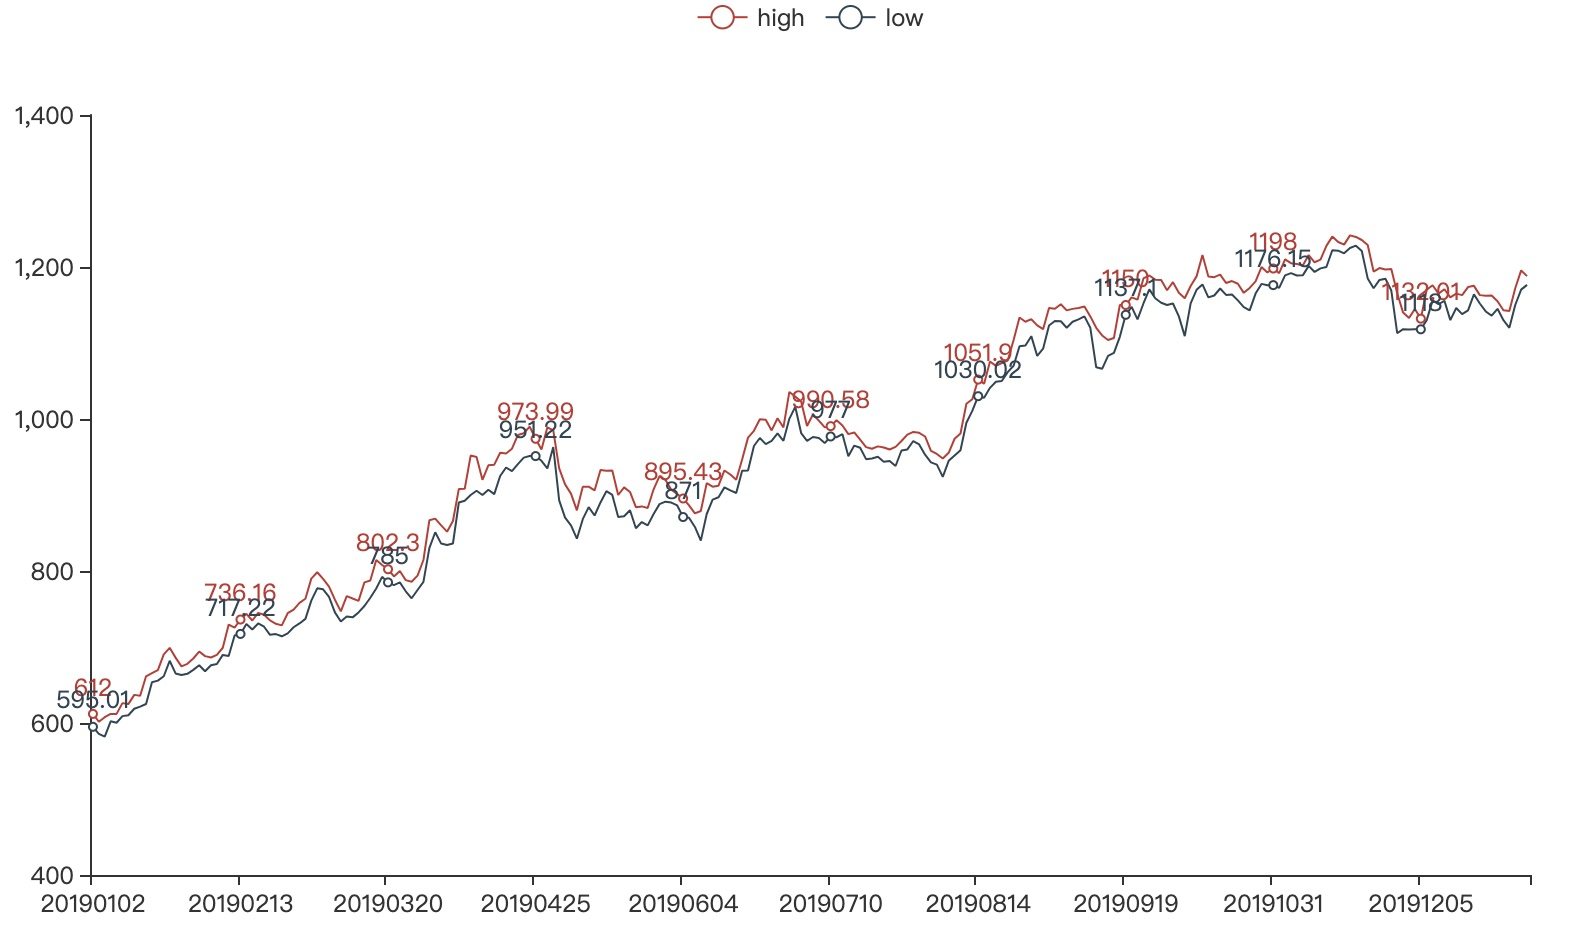

In [ ]:
# 案例六：水球图、仪表盘图

# 计算中国茅台的平均涨跌幅，并分别以水球图和仪表盘图表现出来
# 导入pyecharts.charts中的liquid，作水球图
from pyecharts.charts import Liquid, Page
# 导入配置项入口
from pyecharts import options as opts

In [ ]:
# 中国茅台的平均日涨幅
pct_chg = df1["pct_chg"].mean()
# 构造水球图对象
l = Liquid()
# l.add("", [显示百分比(可以有多组数据)])
l.add("", [pct_chg])
# 设置标题
l.set_global_opts(title_opts=opts.TitleOpts(title="中国茅台2019平均日涨幅"))
# 渲染图片
l.render_notebook()

In [ ]:
from pyecharts.charts import Page,Gauge
g = Gauge()
g.add("中国茅台2019平均日涨幅",[("", round(pct_chg * 100, 2))])
# g.set_global_opts(title_opts = opts.TitleOpts(title="中国茅台2019平均日涨幅"))
g.render_notebook()

In [ ]:
# 案例七：词云图

# task3 统计A股各行业公司数量，并跟进行业分布数据作词云图
# pro = ts.pro_api()
# df2 = pro.stock_basic()
# df2.to_csv("tushare_导出A股行业数据.csv")
df2 = pd.read_csv('/kaggle/input/tushare-a/tushare_A.csv',encoding='utf-8')
# 展示前10行数据
print(df2.head(10))
# 利用groupby函数，以【industry】字段进行groupby，同时结合agg聚合函数统计各个行业的公司数量，将统计所得数据命名为【公司数量】
# df.groupby("被统计的列")["选择一列做运算"].agg({"新列名": "count"})
df_industry = df2.groupby("industry")["industry"].agg(公司数量="count")
print(df_industry)

In [ ]:
from pyecharts import options as opts
from pyecharts.charts import Page, WordCloud

In [ ]:
# 提取各个行业以及其所对应的公司数量，即 行业名字：公司数量
words = list(zip(df_industry.index.values.tolist(), df_industry["公司数量"].values.tolist()))
print(words)

In [ ]:
# 构造词云图对象
wc = WordCloud()
# wc.add("", 数据, word_size_range=[词云图文字的大小范围])
wc.add("", words, word_size_range=[20, 100])
# 设置标题
wc.set_global_opts(title_opts=opts.TitleOpts(title="WordCloud-基本示例"))
# 渲染图片
wc.render_notebook()

In [ ]:
# 案例七：seaborn 作的，带核密度线的直方图；
# 应用数据为，Kaggle上 Bike_Sharing_Demand公开数据，已在该项目上作完整展示
# 这里，仅作示例，不再运行原完整代码
# eg1，单个带核密度直方图
# df_y = np.log1p(df_train['count'])
# ax1 = sns.displot(df_y,kde = True,color='#bdb5e1')
# ax1.figure.set_size_inches(6,4)
# ax1.figure.set_dpi(100)
# ax1.despine(top=False,right=False)
# plt.title('train表_对数变换后租赁总量分布')
# plt.xlabel('对数变换后租赁量count')
# plt.ylabel('样本数')
# plt.tight_layout()
# plt.show()

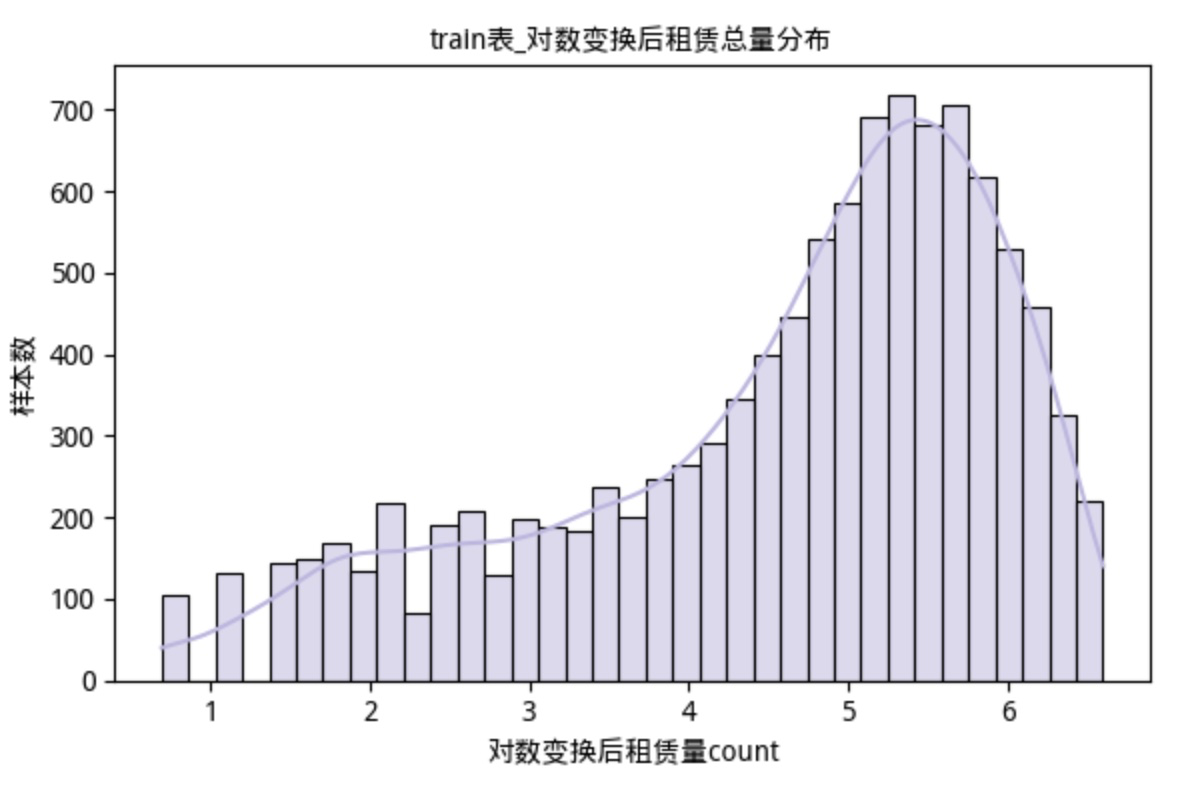

In [ ]:
# eg2，多个直方子图，放置同一画布
# 概览风速、湿度等特征的频率分布；
# fig,axes = plt.subplots(2,2)
# ax1 = sns.histplot(df_whole['temp'],kde = True,ax=axes[0,0],color='#bdb5e1')
# ax2 = sns.histplot(df_whole['atemp'],kde = True,ax=axes[0,1],color='#bdb5e1')
# ax3 = sns.histplot(df_whole['humidity'],kde = True,ax=axes[1,0],color='#bdb5e1')
# ax4 = sns.histplot(df_whole['windspeed'],kde = True,ax=axes[1,1],color='#bdb5e1')
# ax1.figure.set_dpi(120)
# ax2.figure.set_dpi(120)
# ax3.figure.set_dpi(120)
# ax4.figure.set_dpi(120)
# axes[0,0].set(xlabel = 'temp',ylabel = 'samples',title ='实际温度分布')
# axes[0,1].set(xlabel = 'atemp',ylabel = 'samples',title ='体感温度分布')
# axes[1,0].set(xlabel = 'humidity',ylabel = 'samples',title ='湿度分布')
# axes[1,1].set(xlabel = 'windspeed',ylabel = 'samples',title ='风速分布')
# plt.tight_layout() # 防止标题溢出
# plt.show()

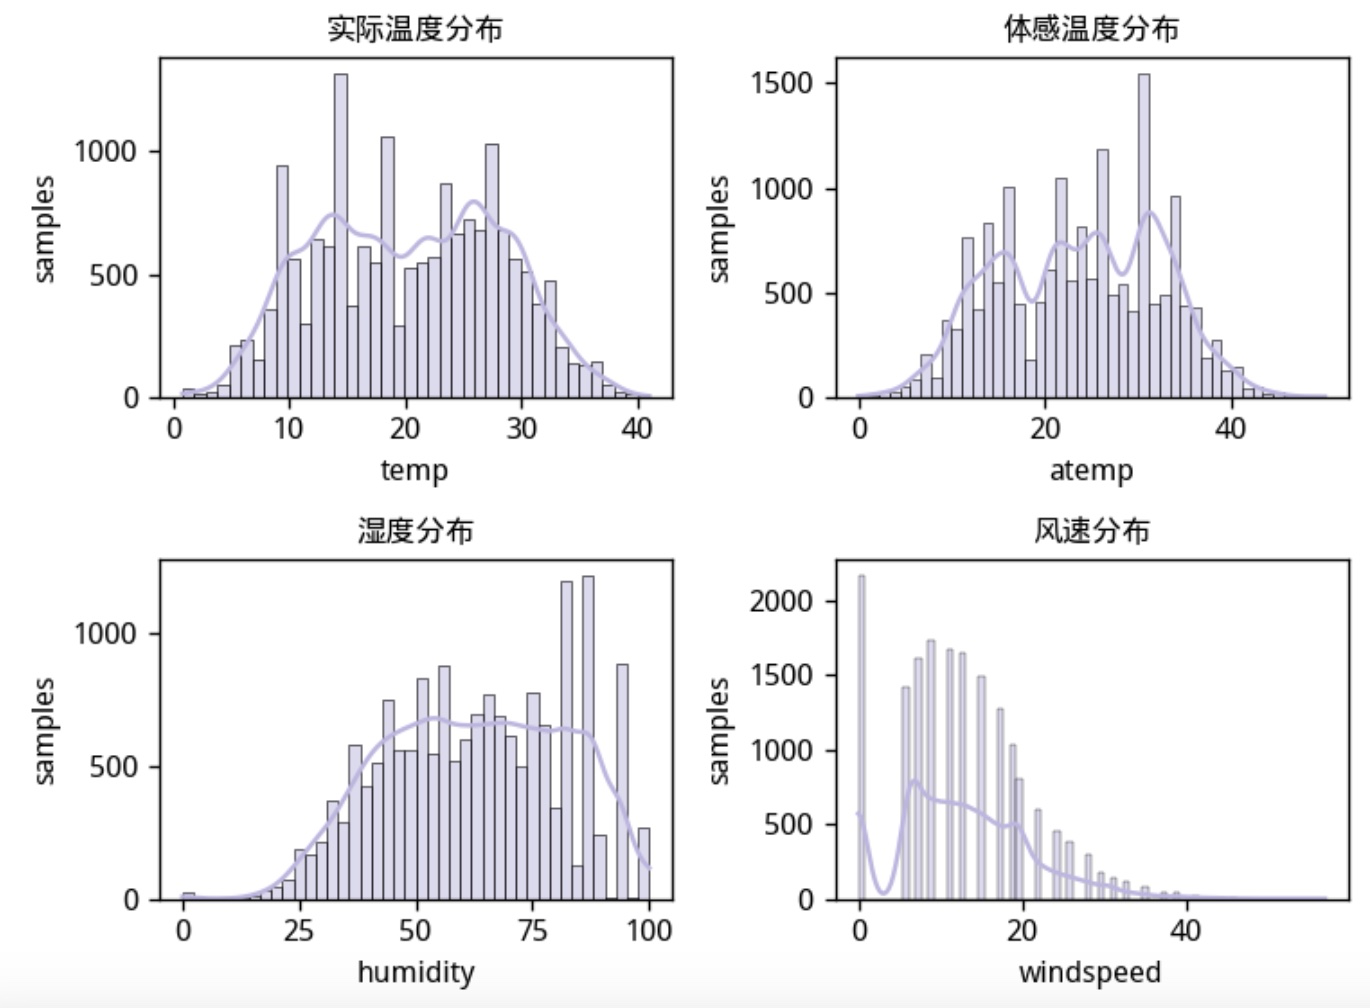

In [ ]:
#eg3，Matplotlib所作多变量折线图
# plt.figure(figsize=(10,3),dpi=100)
# plt.plot(df_temp['season1'],df_temp['count'],label = 'count',color = '#bdb5e1')
# plt.plot(df_temp['season1'],df_temp['registered'],label = 'registered',color = '#f9d580')
# plt.plot(df_temp['season1'],df_temp['casual'],label = 'casual',color = '#b0d992')
# plt.title('按季度日均租赁折线图')
# plt.legend(loc = 2,frameon=False)
# plt.show()

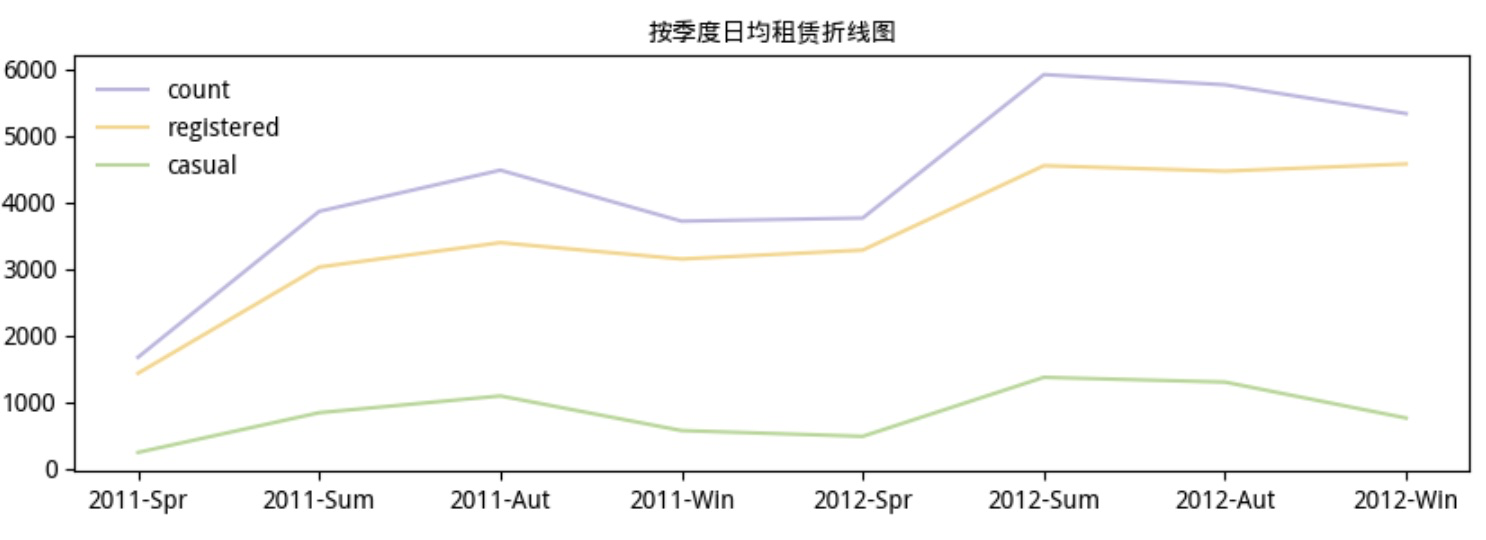

In [ ]:
# eg4，Matplotlib中的饼图--多个子图
# df_workingday_y = np.array(df_workingday.query('workingday == 1')[['registered','casual']]).reshape(-1)
# df_workingday_n = np.array(df_workingday.query('workingday == 0')[['registered','casual']]).reshape(-1)
# plt.figure(figsize=(10,4),dpi=100)
# plt.subplot(1,2,1)
# plt.pie(df_workingday_n,labels = ['registered','casual'],colors = ['#f9d580','#b0d992'],autopct='%1.1f%%')
# plt.title('非工作日')
# plt.subplot(1,2,2)
# plt.pie(df_workingday_y,labels = ['registered','casual'],colors = ['#f9d580','#b0d992'],autopct='%1.1f%%')
# plt.title('工作日')
# plt.show()

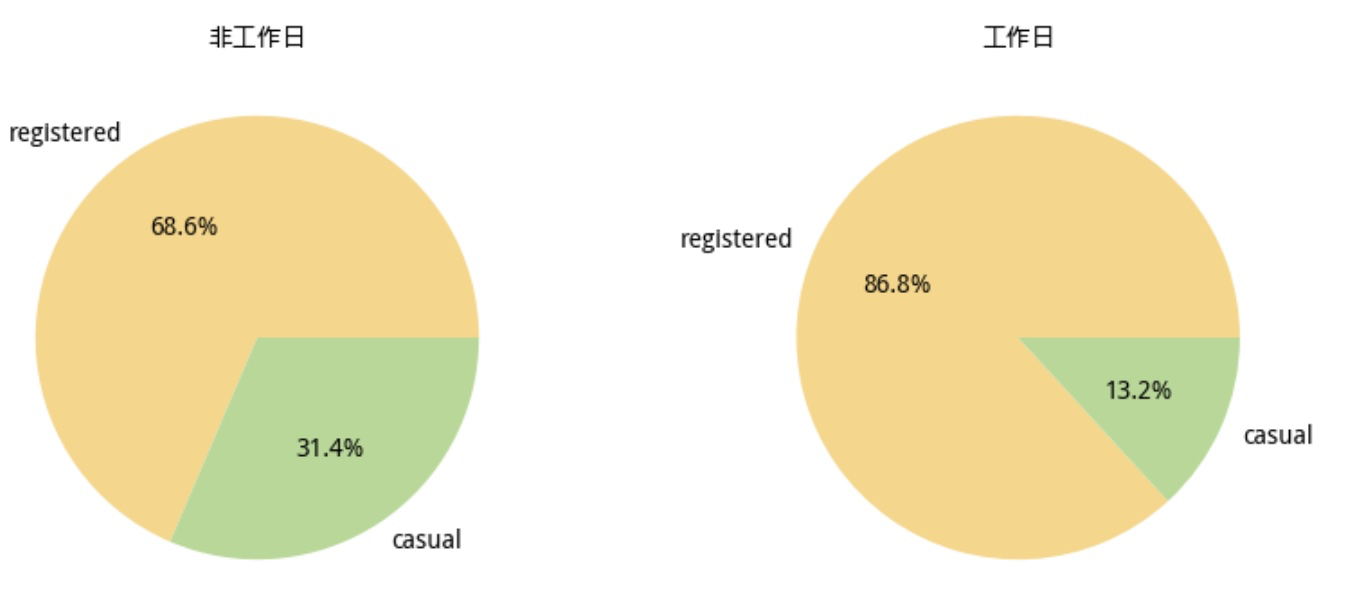

In [ ]:
# eg5，堆叠直方图
# df_weather = df_train.groupby('weather')[['count','registered','casual']].mean().reset_index()
# df_weather['weather'] = df_weather.apply(lambda x:'晴' if x['weather'] == 1 \
#     else '薄雾/云' if x['weather'] == 2 else '小雨/雪' if x['weather'] == 3 else '大雨/暴雪等',axis = 1)
# x1 = df_weather['weather']
# y1 = df_weather['registered']
# y2 = df_weather['casual']
# plt.figure(figsize=(8,5),dpi=100)
# plt.bar(x1,y1,label = 'registered',color = '#f9d580',width =0.5)
# plt.bar(x1,y2,label = 'casual',color = '#b0d992',width =0.5,bottom=y1)
# plt.title('各天气情况下时均租赁直方图')
# plt.legend(loc = 1,frameon=False)
# plt.show()

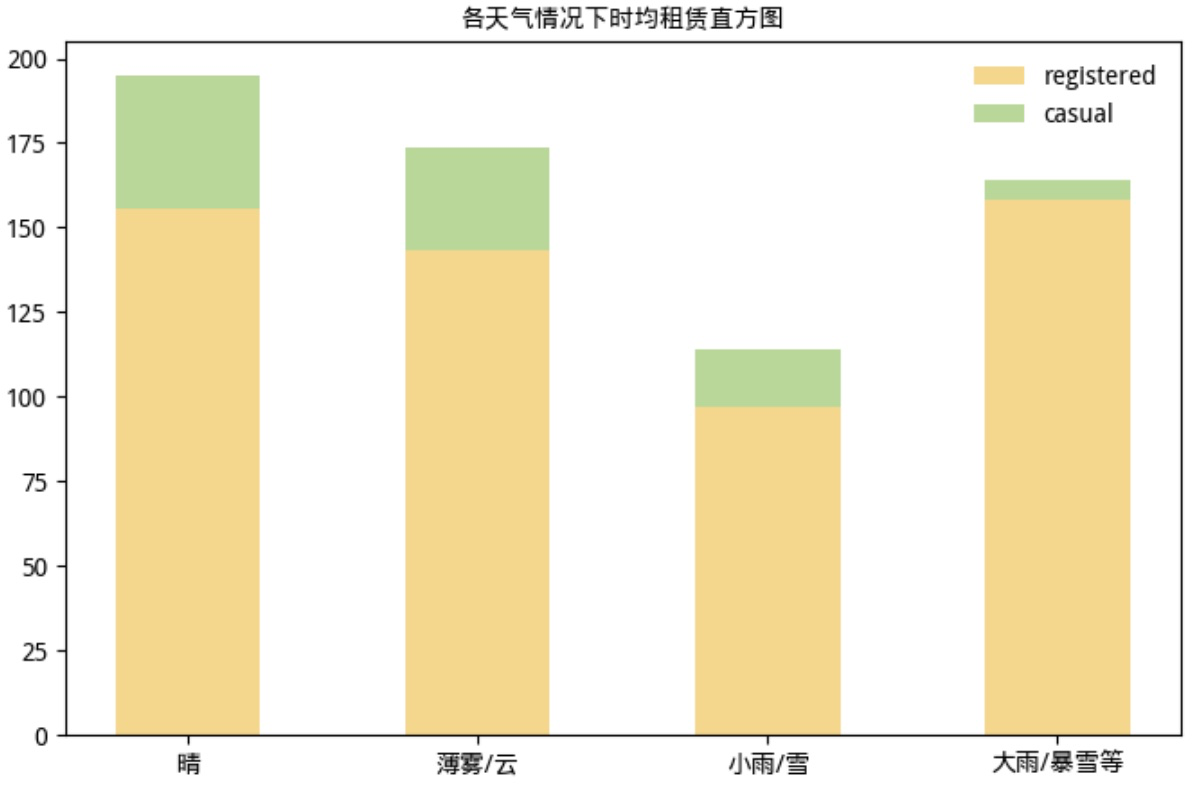

In [ ]:
# eg6，作相关性分析--Seaborn热力图
# 为了只分析相关强度，对可能呈现负相关的，取绝对值；
# df_corr = np.round(np.abs(df_train[df_columns].corr()),3)
# plt.figure(figsize=(10,10),dpi=100)
# cmap 来配置颜色
# sns.heatmap(df_corr,cmap = 'Purples_r',vmin=0,vmax=1,square=True,annot=True,cbar=True)
# 图中可见，相关性越强的，颜色越浅；
# plt.show()

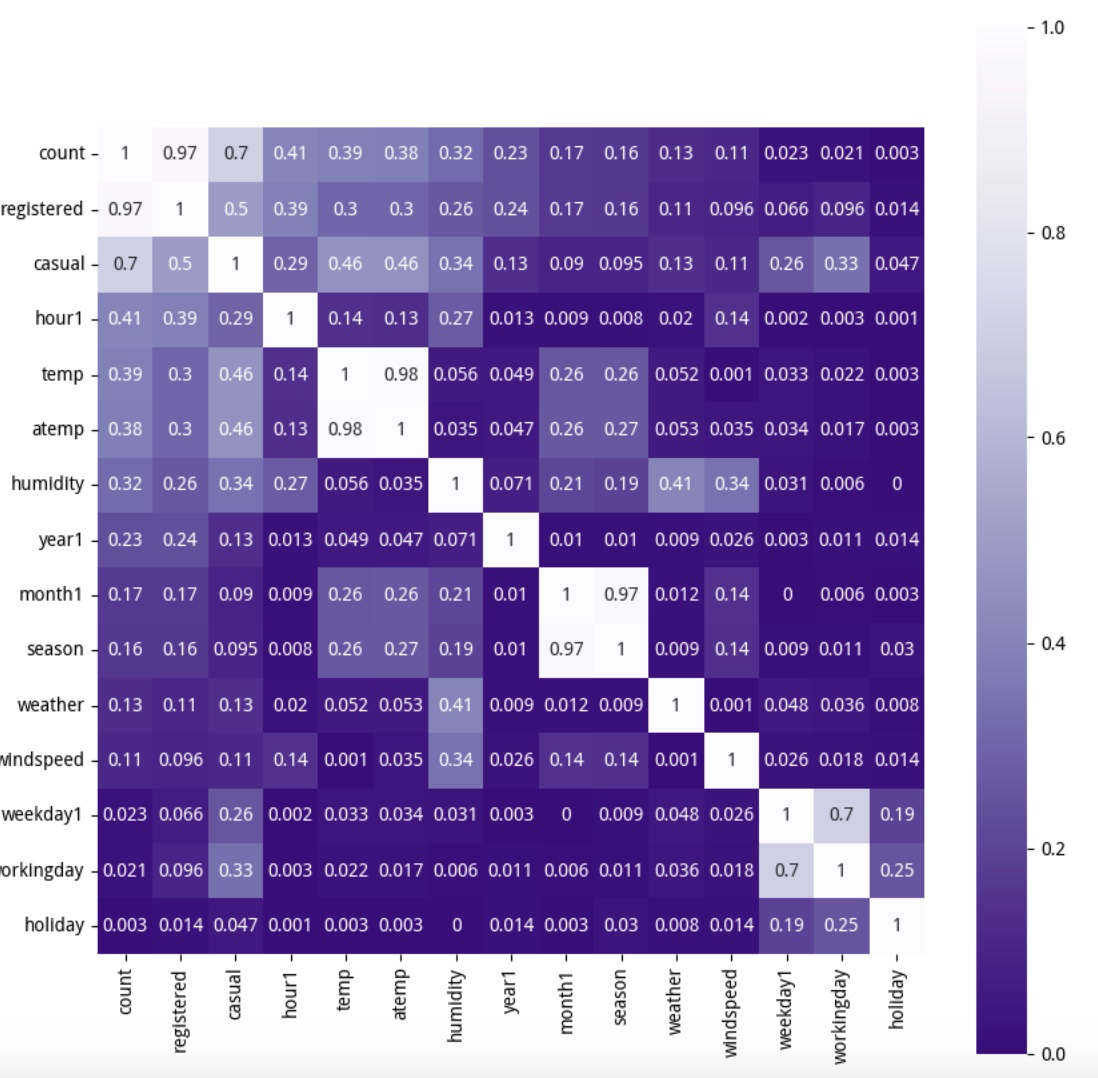